In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
landside=pd.read_csv('landslide_catalog.csv')
earthquake=pd.read_csv('earthquake_database.csv')
# ks1=pd.read_csv('ks-projects-201612.csv',)
# ks2=pd.read_csv('ks-projects-201801.csv')
# policekilling=pd.read_csv('PoliceKillingsUS.csv')
reviews=pd.read_csv('Reviews.csv')
volcano=pd.read_csv('volcano_database.csv')

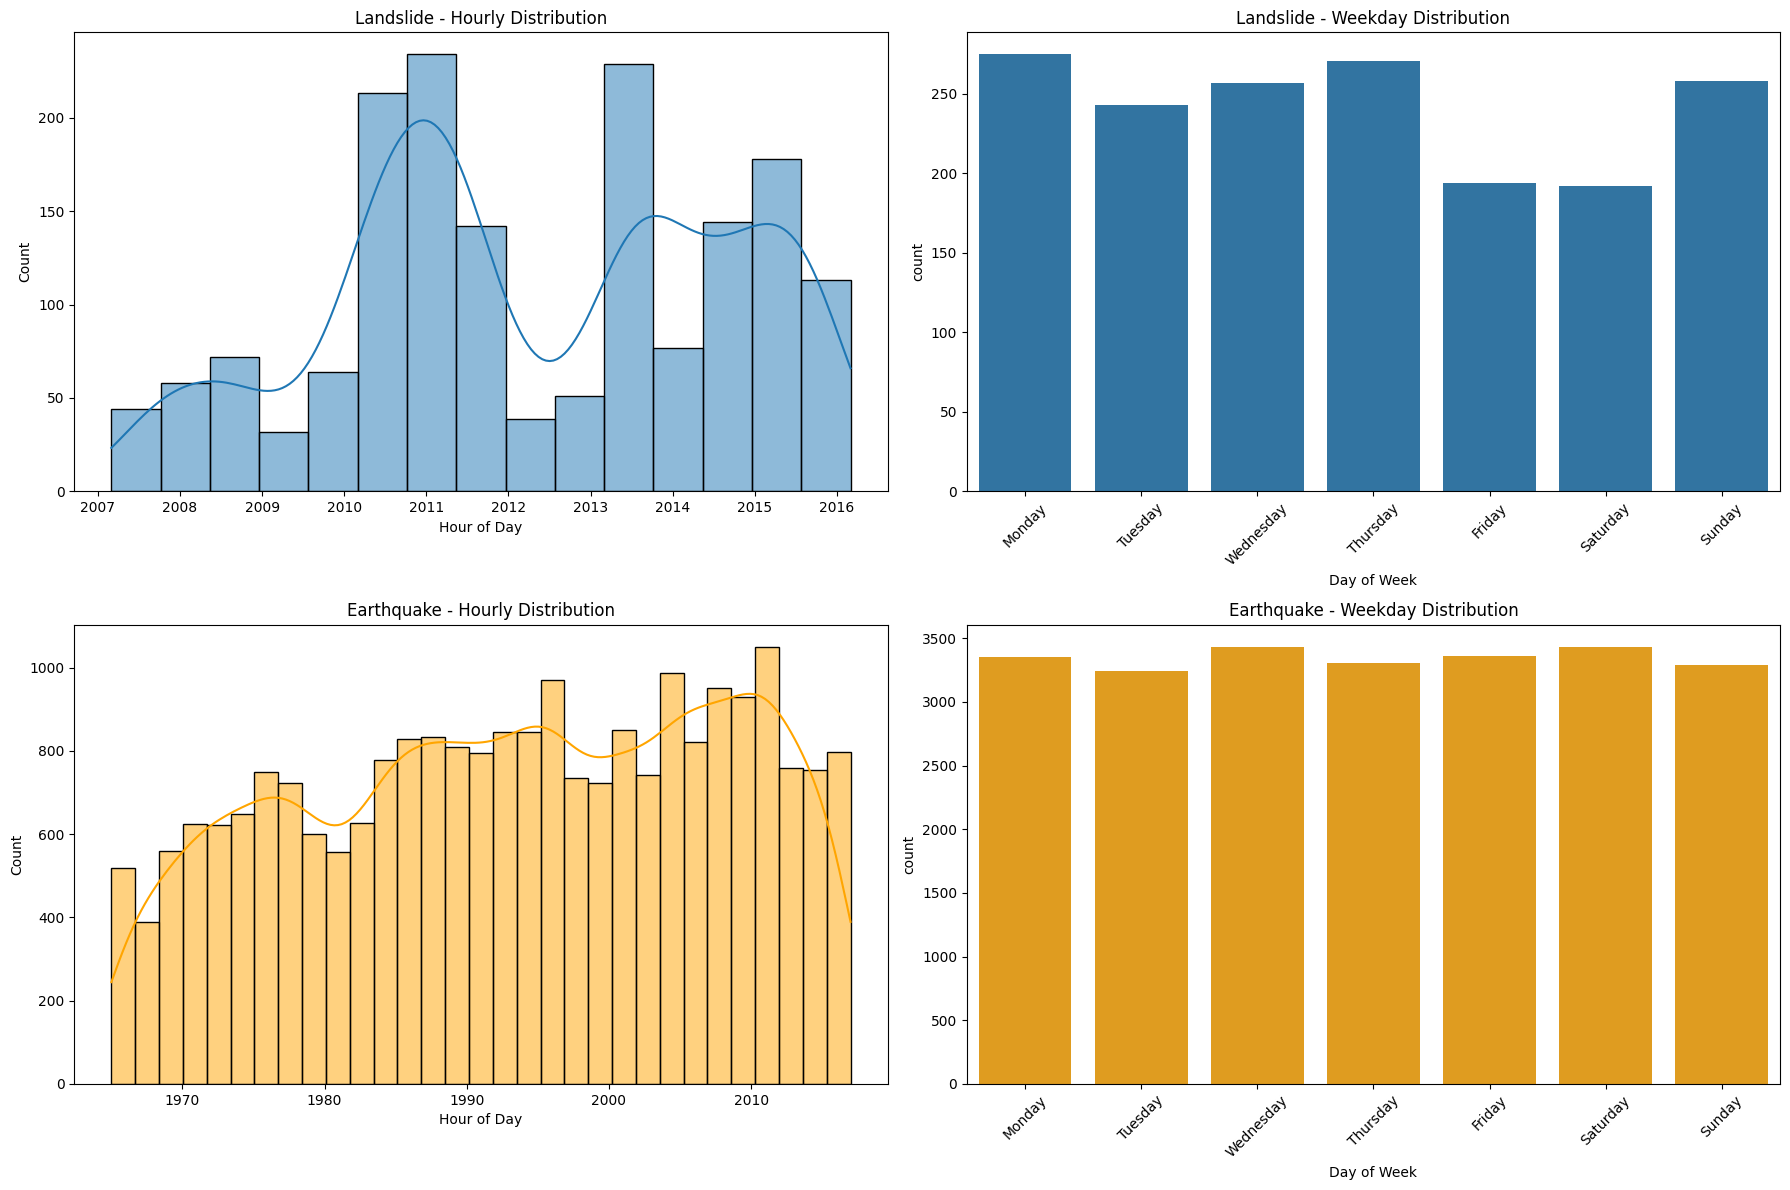

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

landside['date']=pd.to_datetime(landside['date'],format='%d%m%Y')
earthquake['date']=pd.to_datetime(earthquake['Date'],format='mixed', dayfirst=False,utc=True,   )
landside['hour'] = landside['date']
landside['weekday'] = landside['date'].dt.day_name()
earthquake['hour'] = earthquake['date']
earthquake['weekday'] = earthquake['date'].dt.day_name()

# 设置星期顺序
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 创建画布
plt.figure(figsize=(18, 12))

# 滑坡数据日分布
plt.subplot(2, 2, 1)
sns.histplot(data=landside, x='hour',  kde=True)
plt.title('Landslide - Hourly Distribution')
plt.xlabel('Hour of Day')

# 滑坡数据周分布
plt.subplot(2, 2, 2)
sns.countplot(data=landside, x='weekday', order=weekday_order)
plt.title('Landslide - Weekday Distribution')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)

# 地震数据日分布
plt.subplot(2, 2, 3)
sns.histplot(data=earthquake, x='hour', kde=True, color='orange')
plt.title('Earthquake - Hourly Distribution')
plt.xlabel('Hour of Day')

# 地震数据周分布
plt.subplot(2, 2, 4)
sns.countplot(data=earthquake, x='weekday', order=weekday_order, color='orange')
plt.title('Earthquake - Weekday Distribution')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
from requests.compat import chardet

# 检测文件编码
with open('PoliceKillingsUS.csv', 'rb') as csvfile:
    result = chardet.detect(csvfile.read())

# 获取文件编码
file_encoding = result['encoding']
print(f"文件的编码格式是: {file_encoding}")

# 根据检测到的编码格式读取 CSV 文件，同时设置 low_memory=False 避免性能警告
df = pd.read_csv('PoliceKillingsUS.csv', encoding=file_encoding, low_memory=False)

# # 如果有指定的列类型冲突问题，可以强制指定列的类型
# col_types = {13: 'str', 14: 'str', 15: 'str'}  # 假设列 13, 14, 15 存在冲突
# df = pd.read_csv('ks-projects-201612.csv', encoding=file_encoding, low_memory=False, dtype=col_types)

# 检查前 5 行数据
print(df.head())

文件的编码格式是: Windows-1252
   id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun  53.0   
1   4    Lewis Lee Lembke  02/01/15              shot         gun  47.0   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon  32.0   
4   9   Michael Rodriguez  04/01/15              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fl

In [36]:
with open('ks-projects-201801.csv', 'rb') as csvfile:
    result = chardet.detect(csvfile.read())

# 获取文件编码
file_encoding = result['encoding']
print(f"文件的编码格式是: {file_encoding}")

# 根据检测到的编码格式读取 CSV 文件，同时设置 low_memory=False 避免性能警告
df = pd.read_csv('ks-projects-201801.csv', encoding=file_encoding, low_memory=False)

# # 如果有指定的列类型冲突问题，可以强制指定列的类型
# col_types = {13: 'str', 14: 'str', 15: 'str'}  # 假设列 13, 14, 15 存在冲突
# df = pd.read_csv('ks-projects-201612.csv', encoding=file_encoding, low_memory=False, dtype=col_types)

# 检查前 5 行数据
print(df.head())

文件的编码格式是: utf-8
           ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0   

In [38]:
import pandas as pd

# 加载数据
reviews = pd.read_csv('Reviews.csv')

# 原始数据的行数
original_len = len(reviews)

# 去重后的数据
deduplicated_reviews = reviews.drop_duplicates()

# 去重后的行数
deduplicated_len = len(deduplicated_reviews)

# 数据保留百分比
percentage_retained = (deduplicated_len / original_len) * 100

print(f"原始数据的长度: {original_len}")
print(f"去重后的数据长度: {deduplicated_len}")
print(f"数据保留百分比: {percentage_retained:.2f}%")

原始数据的长度: 1758
去重后的数据长度: 1508
数据保留百分比: 85.78%
